In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):    
    return (1 / (1 + np.exp(-(-1+0.5*x))))

In [8]:
np.arange(1,10,1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0, 0.5, 'Probability')

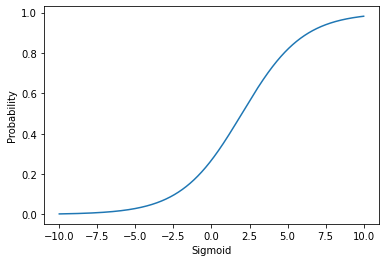

In [3]:
x = np.arange(-10, 10, 0.0001)
y = [sigmoid(n) for n in x]
plt.plot(x,y)
plt.xlabel("Sigmoid")
plt.ylabel("Probability")

In [4]:
%matplotlib inline

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
print(cancer.feature_names)
print(cancer.DESCR)
print(cancer.target)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
    

In [6]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

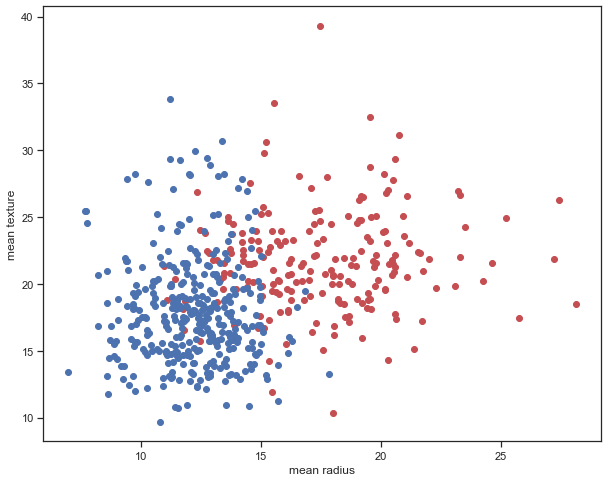

In [29]:
#---copy from dataset into a 2-d list---

X = []
for target in range(2):
    X.append([[], []])    
    for i in range(len(cancer.data)):
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0])
            X[target][1].append(cancer.data[i][1])
            

colours = ("r", "b")   
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

for target in range(2):    
    ax.scatter(X[target][0], X[target][1], c=colours[target])

ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

In [ ]:
import seaborn as sns
df["Diagnosis"] = cancer.target
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, palette = ('b', 'r'), hue="Diagnosis", height=2.5)
plt.show()

KeyboardInterrupt: 

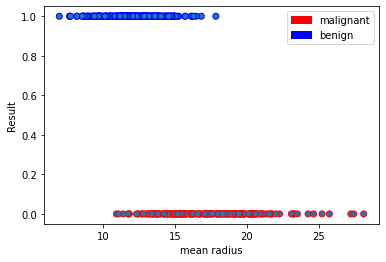

In [9]:
%matplotlib inline
import matplotlib.patches as mpatches

x = df['mean radius']            
y = cancer.target               # 0: malignant, 1: benign
colors = {0:'red', 1:'blue'}    # 0: malignant, 1: benign
plt.scatter(x,y,
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),            
            cmap=colors)
plt.xlabel("mean radius")
plt.ylabel("Result")
red   = mpatches.Patch(color='red', label='malignant')
blue  = mpatches.Patch(color='blue', label='benign')
plt.legend(handles=[red, blue], loc=1)

In [8]:
from sklearn import linear_model
log_regress = linear_model.LogisticRegression()


#---train the model---
log_regress.fit(X = np.array(x).reshape(len(x),1),y = y)

print(log_regress.intercept_)
print(log_regress.coef_)

[15.120902]
[[-1.02475609]]


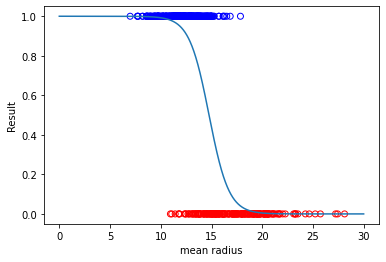

In [10]:
def sigmoid(x):    
    return (1 / (1 + np.exp(-(log_regress.intercept_[0] +  (log_regress.coef_[0][0] * x)))))


x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

plt.scatter(x,y,
            facecolors='none', 
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]),            
            cmap=colors)
plt.xlabel("mean radius")
plt.ylabel("Result")
plt.plot(x1,y1)

In [12]:
print(log_regress.predict([[15]]))

[0]


In [14]:
print(log_regress.predict_proba([[15]]))

[[0.56228462 0.43771538]]


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(cancer.data,               # features                              
                                                                  cancer.target,             # labels                              
                                                                  test_size = 0.25,          # split ratio                              
                                                                  random_state = 1,          # set random seed                              
                                                                  stratify = cancer.target)  # randomize based on labels

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_set = sc.fit_transform(train_set)
test_set = sc.transform(test_set)

In [ ]:
from sklearn import linear_model

x = train_set         
y = train_labels              # 0: malignant, 1: benign
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x,y = y)

In [ ]:
print(log_regress.intercept_)
print(log_regress.coef_)

In [ ]:
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))
preds_prob.columns = ["Malignant", "Benign"]

preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, preds))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, preds))